In [2]:
import numpy as np
import pylab as plt
from collections import Counter
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))
from pyabc.examples import tuberculosis
import pyabc.prior
from pyabc.plots import plot_marginals, plot_particles, plot_pairs
%matplotlib notebook

## Intractable model by Tanaka et al. 2006 for spread of tuberculosis

![](img/transmission_process.png)

### model parameter
$\alpha$: rate with which each infectious host randomly infects other individuals from an unlimited supply of hosts

$\delta$: rate with which a host stops being infectious, either by recovering or dying

$\tau$: rate with which the pathogen of the host mutates randomly within the host, generating a novel haplotype under a single-locus infinite alleles model

$\theta = (\alpha, \delta, \tau)$

$y_{\theta} = (6,3,2,2,1,1,1,1,1,1,1)$: output, vector of clusters, that is different haplotypes. Each number represents the infectious hosts for this particular haplotype

### Observation
$\alpha = 0.2, \delta = 0, \tau = 0.198, m = 20$

assume, that $\delta, \tau$ are known and apply uniform prior

In [3]:
alpha = 0.2
delta = 0
tau = 0.198
m = 20
N = 2e7

prior_alpha = pyabc.Prior("uniform", 0.005, 2, name=r"$\alpha$")
#prior_tau = pyabc.Prior("uniform", 0.01, 1, name="$\tau$")

list_of_priors = [prior_alpha]

simulator = tuberculosis.simulator

In [4]:
# for i in range(100):
#     params = [prior_alpha.sample(),prior_delta.sample(),prior_tau.sample()]
#     y0 = simulator(*params)

params = [alpha, tau, delta]



y0 = np.array([6,3,2,2,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0]) # from paper

T1
0.55
T2
0.85


<IPython.core.display.Javascript object>


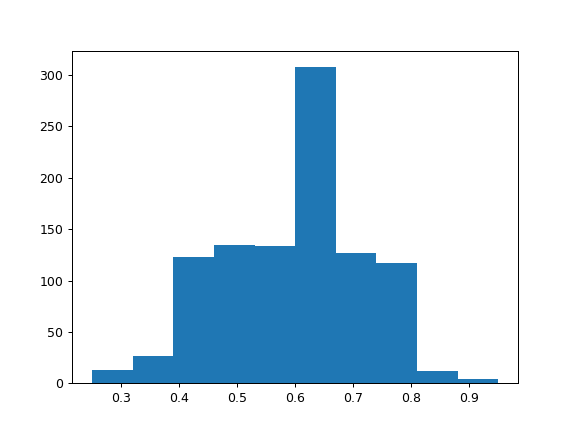

(array([  13.,   27.,  123.,  135.,  134.,  308.,  127.,  117.,   12.,    4.]),
 array([ 0.25,  0.32,  0.39,  0.46,  0.53,  0.6 ,  0.67,  0.74,  0.81,
         0.88,  0.95]),
 <a list of 10 Patch objects>)

In [5]:
list_of_sum = tuberculosis.summaries
for f in list_of_sum:
    print(f.__name__)
    print(f(y0))
    
#summaries = tuberculosis.summaries
T = []
for i in range(1000):
    y = simulator(alpha)
    T.append(list_of_sum[0](y))
    
plt.hist(T)

### ABC with summary stats

In [5]:
path_to_data = "C:\\Users\\Admin\\Dropbox\\AppliedCognitiveModelling2017\\ABC\\03 data"

In [29]:
summaries = [lambda x: x]
rej = pyabc.RejectionSampler(priors=list_of_priors, simulator=simulator, 
                             summaries=summaries,
                             observation=y0, seed = 1337, verbosity=1)
smc = pyabc.SMCSampler(priors=list_of_priors, simulator=simulator, 
                             summaries=summaries,
                             observation=y0, seed = 1337)
mcmc = pyabc.MCMCSampler(priors=list_of_priors, simulator=simulator, 
                             summaries=summaries,
                             observation=y0, seed = 1337)
abcde = pyabc.ABCDESampler(priors=list_of_priors, simulator=simulator, 
                             summaries=summaries,
                             observation=y0, seed = 1337)

TypeError: Can't instantiate abstract class ABCDESampler with abstract methods log

In [ ]:
nr_samples, threshold = 10000, 0
rej.sample(nr_samples=nr_samples, threshold=threshold)

fname = os.path.join(path_to_data, "ex02", "rej_{}_{}.pkl".format(nr_samples, str(threshold).replace(".", "_")))
rej.save(fname)

Rejection sampler started with threshold: 0 and number of samples: 40000


In [13]:
#load data
rej = pyabc.RejectionSampler.load("/home/michael/Dropbox/AppliedCognitiveModelling2017/ABC/03 data/ex02/rej_10000_0.pkl")

print(rej.threshold)
print(rej.runtime)
print(rej.acceptance_rate)

0
11981.297611562404
0.0019755037534571317


In [ ]:
nr_samples, thresholds = 10000, np.linspace(4, 0, 5)
smc.sample(nr_samples=nr_samples, thresholds=thresholds)

fname = os.path.join(path_to_data, "ex02", "smc_{}_{}.pkl".format(nr_samples, str(thresholds[-1]).replace(".", "_")))
smc.save(fname)

In [14]:
#load smc
#load data
smc = pyabc.SMCSampler.load("/home/michael/Dropbox/AppliedCognitiveModelling2017/ABC/03 data/ex02/smc_10000_0_0.pkl")

print(smc.thresholds)
print(smc.runtime)
print(smc.acceptance_rate)

[ 4.  3.  2.  1.  0.]
15694.483501727462
0.0031849588407769007


In [ ]:
nr_samples, threshold, step_size = 10000, 0, [0.1]
mcmc.sample(nr_samples=nr_samples, threshold=threshold, step_size = step_size)

fname = os.path.join(
    path_to_data, "ex02", "mcmc_{}_{}_{}.pkl".format(
        nr_samples, 
        str(threshold).replace(".", "_"), 
        str(step_size[0]).replace(".", "_")
    )
)
                     
mcmc.save(fname)

In [17]:
#load data
mcmc = pyabc.MCMCSampler.load("/home/michael/Dropbox/AppliedCognitiveModelling2017/ABC/03 data/ex02/mcmc_10000_0_0_1.pkl")


print(mcmc.threshold)
#print(mcmc.step_size)
print(mcmc.runtime)
print(mcmc.acceptance_rate)

0
6879.1786185807105
0.006143351419359912


<IPython.core.display.Javascript object>


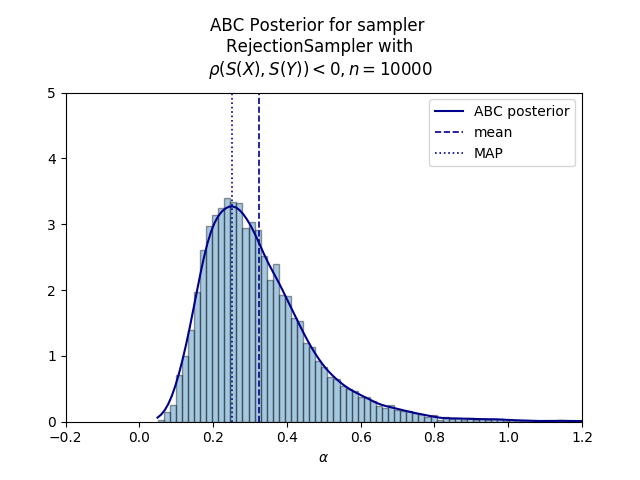

<IPython.core.display.Javascript object>


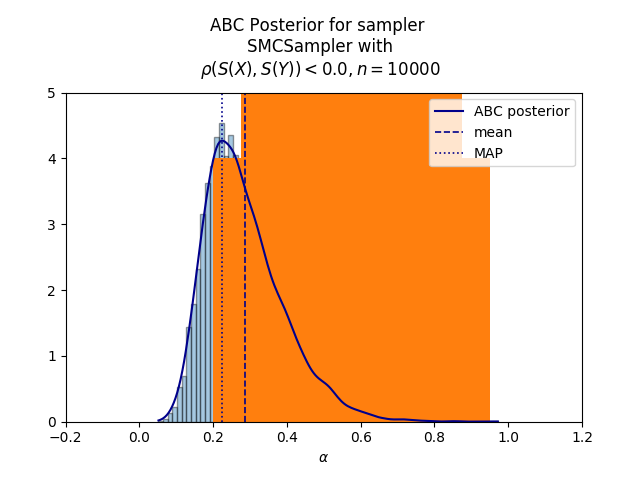

<IPython.core.display.Javascript object>


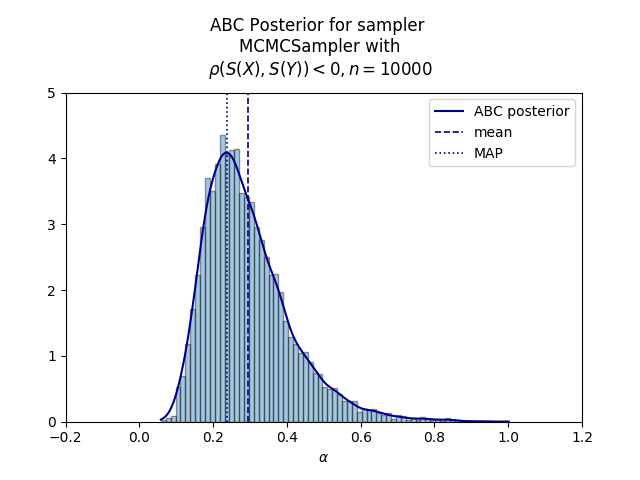

In [10]:
fig = plot_marginals(rej, kde=True, normed=True, xlim=[[-0.2, 1.2]], ylim=[0, 5])
plt.savefig("ex02_rej_n_10000_e_0_D_1.pdf")
fig = plot_marginals(smc, kde=True, normed=True, xlim=[[-0.2, 1.2]], ylim=[0, 5])
plt.savefig("ex02_smc_n_10000_e_0_D_1.pdf")
fig = plot_marginals(mcmc, kde=True, normed=True, xlim=[[-0.2, 1.2]], ylim=[0, 5])
plt.savefig("ex02_mcmc_n_10000_e_0_D_1.pdf")
#fig = plot_marginals(abcde, kde=True, normed=True)
#plot_marginals(bolfi, kde=True, normed=True)

## Influence of Summary Stats

In [22]:
T_1, T_2 = tuberculosis.summaries

In [23]:
T_1(y0)

0.55

In [24]:
T_2(y0)

0.84999999999999998

## T1 

In [25]:
T_1, T_2 = tuberculosis.summaries
rej = pyabc.RejectionSampler(priors=list_of_priors, simulator=simulator, 
                             summaries=[T_1],
                             observation=y0, seed = 1337, verbosity=1)
smc = pyabc.SMCSampler(priors=list_of_priors, simulator=simulator, 
                             summaries=[T_1],
                             observation=y0, seed = 1337)
mcmc = pyabc.MCMCSampler(priors=list_of_priors, simulator=simulator, 
                         summaries=[T_1], 
                         observation=y0, seed = 1337)

MCMC sampler started with threshold: 0.2 and number of samples: 10000
Samples:     10 - Threshold: 0.2000 - Iterations:         50 - Acceptance rate: 0.200000 - Time:     0.14 s
Samples:  10000 - Threshold: 0.2000 - Iterations:      21668 - Acceptance rate: 0.461510 - Time:    85.65 s


<IPython.core.display.Javascript object>


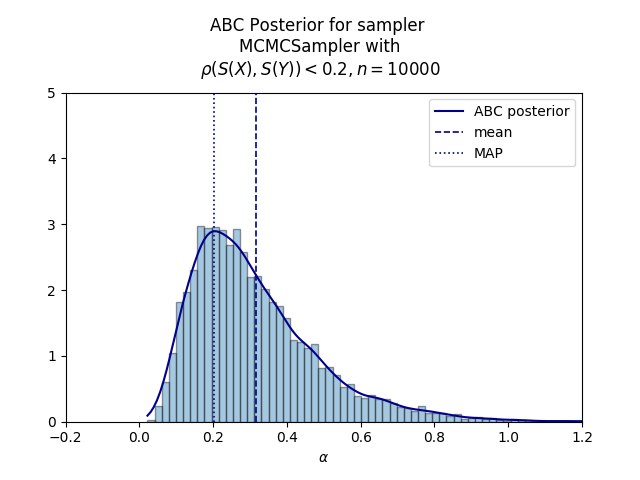

MCMC sampler started with threshold: 0.1 and number of samples: 10000
Samples:     10 - Threshold: 0.1000 - Iterations:         50 - Acceptance rate: 0.200000 - Time:     0.20 s
Samples:  10000 - Threshold: 0.1000 - Iterations:      38492 - Acceptance rate: 0.259794 - Time:   153.36 s


<IPython.core.display.Javascript object>


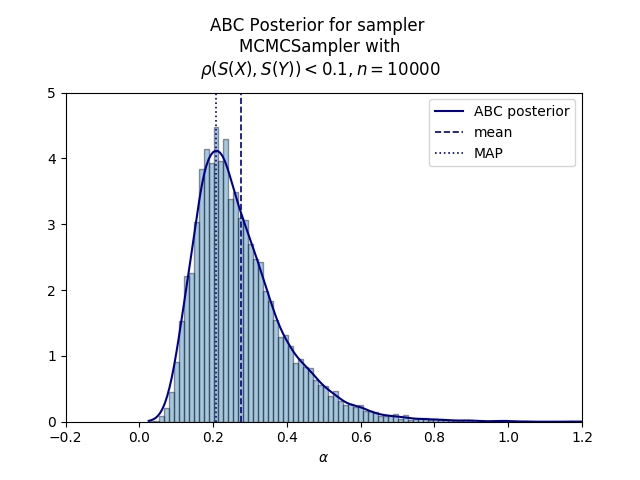

MCMC sampler started with threshold: 0.05 and number of samples: 10000
Samples:     10 - Threshold: 0.0500 - Iterations:        220 - Acceptance rate: 0.045455 - Time:     0.72 s
Samples:  10000 - Threshold: 0.0500 - Iterations:      71372 - Acceptance rate: 0.140111 - Time:   300.00 s


<IPython.core.display.Javascript object>


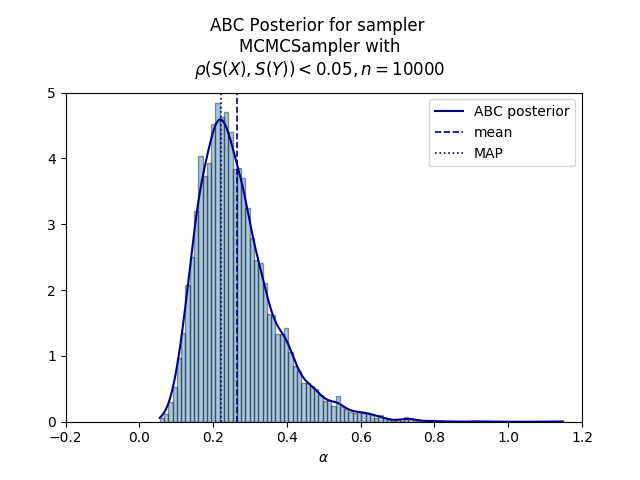

In [26]:
mcmc.sample(nr_samples=10000, threshold=0.2, step_size = [0.1])
fig = plot_marginals(mcmc, kde=True, normed=True, xlim=[[-0.2, 1.2]], ylim=[0, 5])
plt.savefig("ex02_mcmc_T1_n_10000_e_0_2_s_0_1.pdf")

mcmc.sample(nr_samples=10000, threshold=0.1, step_size = [0.1])
fig = plot_marginals(mcmc, kde=True, normed=True, xlim=[[-0.2, 1.2]], ylim=[0, 5])
plt.savefig("ex02_mcmc_T1_n_10000_e_0_1_s_0_1.pdf")

mcmc.sample(nr_samples=10000, threshold=0.05, step_size = [0.1])
fig = plot_marginals(mcmc, kde=True, normed=True, xlim=[[-0.2, 1.2]], ylim=[0, 5])
plt.savefig("ex02_mcmc_T1_n_10000_e_0_0_5_s_0_1.pdf")

## T2

In [27]:
T_1, T_2 = tuberculosis.summaries
rej = pyabc.RejectionSampler(priors=list_of_priors, simulator=simulator, 
                             summaries=[T_2],
                             observation=y0, seed = 1337, verbosity=1)
smc = pyabc.SMCSampler(priors=list_of_priors, simulator=simulator, 
                             summaries=[T_2],
                             observation=y0, seed = 1337)
mcmc = pyabc.MCMCSampler(priors=list_of_priors, simulator=simulator, 
                         summaries=[T_2], 
                         observation=y0, seed = 1337)

MCMC sampler started with threshold: 0.2 and number of samples: 10000
Samples:     10 - Threshold: 0.2000 - Iterations:         30 - Acceptance rate: 0.333333 - Time:     0.10 s
Samples:  10000 - Threshold: 0.2000 - Iterations:      15219 - Acceptance rate: 0.657073 - Time:    65.21 s


<IPython.core.display.Javascript object>


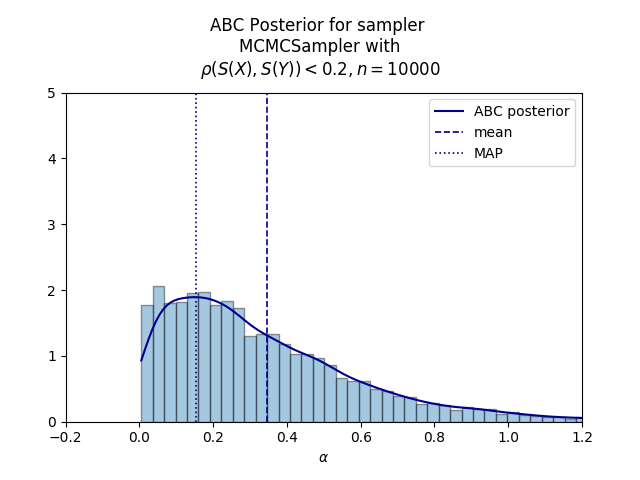

MCMC sampler started with threshold: 0.1 and number of samples: 10000
Samples:     10 - Threshold: 0.1000 - Iterations:         30 - Acceptance rate: 0.333333 - Time:     0.30 s
Samples:  10000 - Threshold: 0.1000 - Iterations:      15918 - Acceptance rate: 0.628220 - Time:    79.77 s


<IPython.core.display.Javascript object>


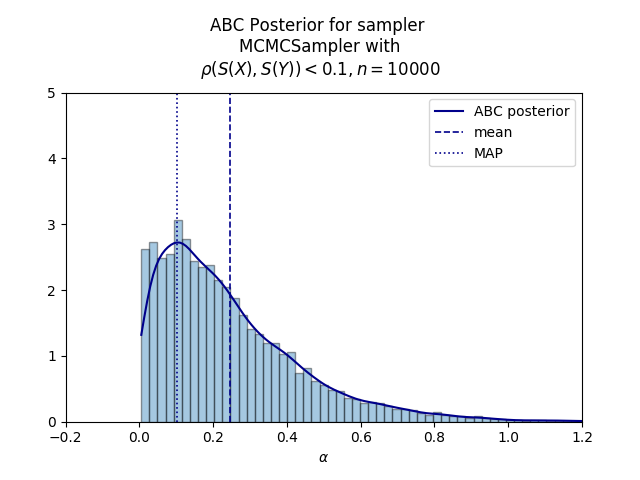

MCMC sampler started with threshold: 0.05 and number of samples: 10000
Samples:     10 - Threshold: 0.0500 - Iterations:        130 - Acceptance rate: 0.076923 - Time:     0.41 s
Samples:  10000 - Threshold: 0.0500 - Iterations:      36017 - Acceptance rate: 0.277647 - Time:   138.57 s


<IPython.core.display.Javascript object>


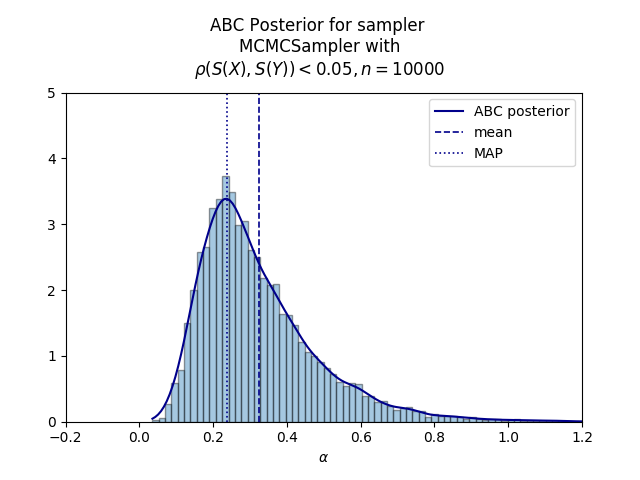

In [28]:
mcmc.sample(nr_samples=10000, threshold=0.2, step_size = [0.1])
fig = plot_marginals(mcmc, kde=True, normed=True, xlim=[[-0.2, 1.2]], ylim=[0, 5])
plt.savefig("ex02_mcmc_T2_n_10000_e_0_2_s_0_1.pdf")

mcmc.sample(nr_samples=10000, threshold=0.1, step_size = [0.1])
fig = plot_marginals(mcmc, kde=True, normed=True, xlim=[[-0.2, 1.2]], ylim=[0, 5])
plt.savefig("ex02_mcmc_T2_n_10000_e_0_1_s_0_1.pdf")

mcmc.sample(nr_samples=10000, threshold=0.05, step_size = [0.1])
fig = plot_marginals(mcmc, kde=True, normed=True, xlim=[[-0.2, 1.2]], ylim=[0, 5])
plt.savefig("ex02_mcmc_T2_n_10000_e_0_0_5_s_0_1.pdf")

In [6]:
#load data
mcmc = pyabc.MCMCSampler.load("/home/michael/Dropbox/AppliedCognitiveModelling2017/ABC/03 data/ex02/mcmc_n_10000_e_0_s_0_1.pkl")


print(mcmc.threshold)
#print(mcmc.step_size)
print(mcmc.runtime)
print(mcmc.acceptance_rate)

0
632.8814215757451
0.06220723718997468


<IPython.core.display.Javascript object>


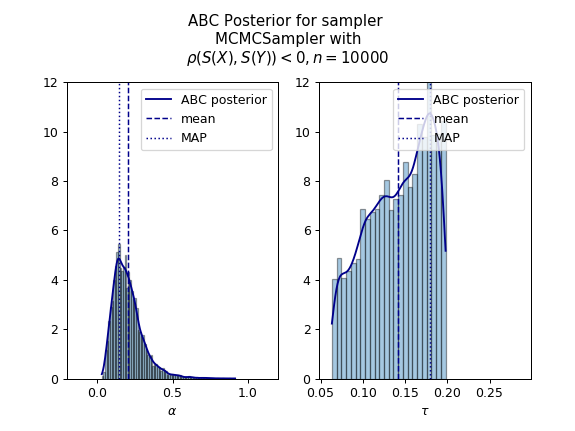

In [10]:
fig = plot_marginals(mcmc, kde=True, normed=True, xlim=[[-0.2, 1.2], [np.mean(mcmc.Thetas)-2*0.0625, np.mean(mcmc.Thetas)+2*0.0625]], ylim=[0, 12])
#plt.savefig("ex02_mcmc_T1_n_10000_e_0_2_s_0_1.pdf")

# BOLFI

In [1]:
list_of_priors

NameError: name 'list_of_priors' is not defined

In [ ]:
bolfi = pyabc.BOLFI(priors=list_of_priors, simulator=simulator, 
                             summaries=summaries,
                             observation=y0, domain=[(0.005, 2.005)], seed = 1337)



In [ ]:
bolfi.sample(nr_samples=1_000, threshold=2, initial_evidence_size=10, max_iter=100, n_chains=4, burn_in=100)

In [ ]:
plot_marginals(bolfi, xlim=[[-0.2, 1.2]])

In [ ]:
import elfi

In [ ]:
elfi.new_model()

p = elfi.Prior('uniform', 0.005, 2)

def sim(x, batch_size, random_state):
    return simulator(x)

Y = elfi.Simulator(sim, p, observed=y0)

s = elfi.Summary(lambda x: x, Y)

d = elfi.Distance('euclidean', s)

elfi.draw(d)

In [ ]:
elfibolfi = elfi.BOLFI(d, batch_size=1, initial_evidence=10, update_interval=10,
                   bounds={'p': (0.005, 2.005)}, acq_noise_var=[0.1], seed=101)

In [ ]:
post = elfibolfi.fit(n_evidence=200, threshold=2)

In [ ]:
result_elfi = elfibolfi.sample(1000, info_freq=1000)

In [ ]:
result_elfi.plot_marginals(normed=True)